<a href="https://colab.research.google.com/github/A16S10/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bike Sharing Demand Prediction**

# Objective of the Project:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

Objective of this project is to correctly predict Bike to be rented in differnt time periods,differnt climatic conditions in Seoul City.
Rental prediction model can be done by using differnt machine learning Regression algorithms.
This project aims to correctly predict bike demand in near future so that we can make necessary arrangemets beforehand.


By employing exploratory data analysis (EDA) and robust machine learning regression algorithms,
we will unveil hidden insights in customer behavior, enabling us to target campaigns with laser-sharp precision.
This translates to higher engagement, deeper customer relationships, and optimized marketing ROI.

#About the dataset

Link to the dataset: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand


Date : year-month-day


Rented Bike count - Count of bikes rented at each hour


Hour - Hour of he day(0-23)


Temperature-Temperature in Celsius


Humidity - Humidity Measure


Windspeed - Windspeed (m/s)


Visibility - visibility Measure


Dew point temperature - Dew point temperature in Celsius


Solar radiation - Solar radiation MJ/m2


Rainfall - Rainfall mm


Snowfall - Snowfall  cm


Seasons - Winter, Spring, Summer, Autumn


Holiday - Holiday/No holiday


Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# GitHub Link

https://github.com/A16S10/Bike_Sharing_Demand_Prediction

# Data Cleaning and PreProcessing

Basic Cleanup


Clean and preprocess the dataset (handling missing values, data typesin desired format,removing dupliactes,checking for Nan Values etc.).

In [327]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

#importing libraries for feature engineering
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

#importing libraries for data modelling
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA

# To supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The initial steps to get an overview of any dataset is to:

1.observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not

2.get information about the number of rows and columns in the dataset

3.find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

4.check the statistical summary of the dataset to get an overview of the numerical columns of the data.

In [328]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [329]:
#Loading the Dataset
data=pd.read_csv("/content/drive/MyDrive/Datsets/SeoulBikeData.csv",encoding='unicode_escape')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [330]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [331]:
#Renaming column names

data.rename(columns={'Rented Bike Count':'Rented Bike Count per Hr',"Temperature(°C)":"Temperature","Humidity(%)":"Humidity","Wind speed (m/s)":"Wind Speed","Visibility (10m)":"Visibility","Dew point temperature(°C)":"Dew Point Temperature","Solar Radiation (MJ/m2)":"Solar Radiation","Snowfall (cm)":"Snowfall",'Rainfall(mm)':"Rainfall"},inplace=True)

In [332]:
data.columns

Index(['Date', 'Rented Bike Count per Hr', 'Hour', 'Temperature', 'Humidity',
       'Wind Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')

In [333]:
#Taking first 5 rows from dataset

data.head()

,Date,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [334]:
#Taking last 5 rows from dataset

data.tail()

,Date,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [335]:
#Taking info about dataset to check consistency of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count per Hr  8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature               8760 non-null   float64
 4   Humidity                  8760 non-null   int64  
 5   Wind Speed                8760 non-null   float64
 6   Visibility                8760 non-null   int64  
 7   Dew Point Temperature     8760 non-null   float64
 8   Solar Radiation           8760 non-null   float64
 9   Rainfall                  8760 non-null   float64
 10  Snowfall                  8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

There are a total of 15 columns and 8760 observations in the dataset.We can see that there are no null values.Datatype of Date,Seaosns,Holiday,Functioning day need to be changed.

In [336]:
Column_List = ['Seasons', 'Holiday', 'Functioning Day']
for column in Column_List:
    print(data[column].unique())



['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']


In [337]:
#Defining function to convert datatype from object to string

for column in Column_List:
    data[column]=data[column].astype('string')

In [338]:
#Changing Datatype from object to datetime

data['Date']=pd.to_datetime(data['Date'],dayfirst=True,errors='coerce')


In [339]:
#Check if all daatypes are in desired format

data.dtypes

Date                        datetime64[ns]
Rented Bike Count per Hr             int64
Hour                                 int64
Temperature                        float64
Humidity                             int64
Wind Speed                         float64
Visibility                           int64
Dew Point Temperature              float64
Solar Radiation                    float64
Rainfall                           float64
Snowfall                           float64
Seasons                             string
Holiday                             string
Functioning Day                     string
dtype: object

In [340]:
#Separating Day,Month,Year and dropping Date column as we dont need it anymore

data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Year'] = data['Date'].dt.year
data.drop('Date',axis=1,inplace=True)

In [341]:
data

,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Day,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018


In [342]:
#statistical summery of dataset

data.describe()


,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Month,Day,Year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,15.720548,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,8.796749,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,8.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,16.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,23.000000,2018.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,31.000000,2018.000000


In [343]:
#checking if null value is there or not

data.isnull().sum()

Rented Bike Count per Hr    0
Hour                        0
Temperature                 0
Humidity                    0
Wind Speed                  0
Visibility                  0
Dew Point Temperature       0
Solar Radiation             0
Rainfall                    0
Snowfall                    0
Seasons                     0
Holiday                     0
Functioning Day             0
Month                       0
Day                         0
Year                        0
dtype: int64

In [344]:
#checking if any duplicate rows there or not

duplicate_rows=data[data.duplicated()]
duplicate_rows

,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Day,Year


In [345]:
#checking if any NA values there or not

data.isna().sum()

Rented Bike Count per Hr    0
Hour                        0
Temperature                 0
Humidity                    0
Wind Speed                  0
Visibility                  0
Dew Point Temperature       0
Solar Radiation             0
Rainfall                    0
Snowfall                    0
Seasons                     0
Holiday                     0
Functioning Day             0
Month                       0
Day                         0
Year                        0
dtype: int64

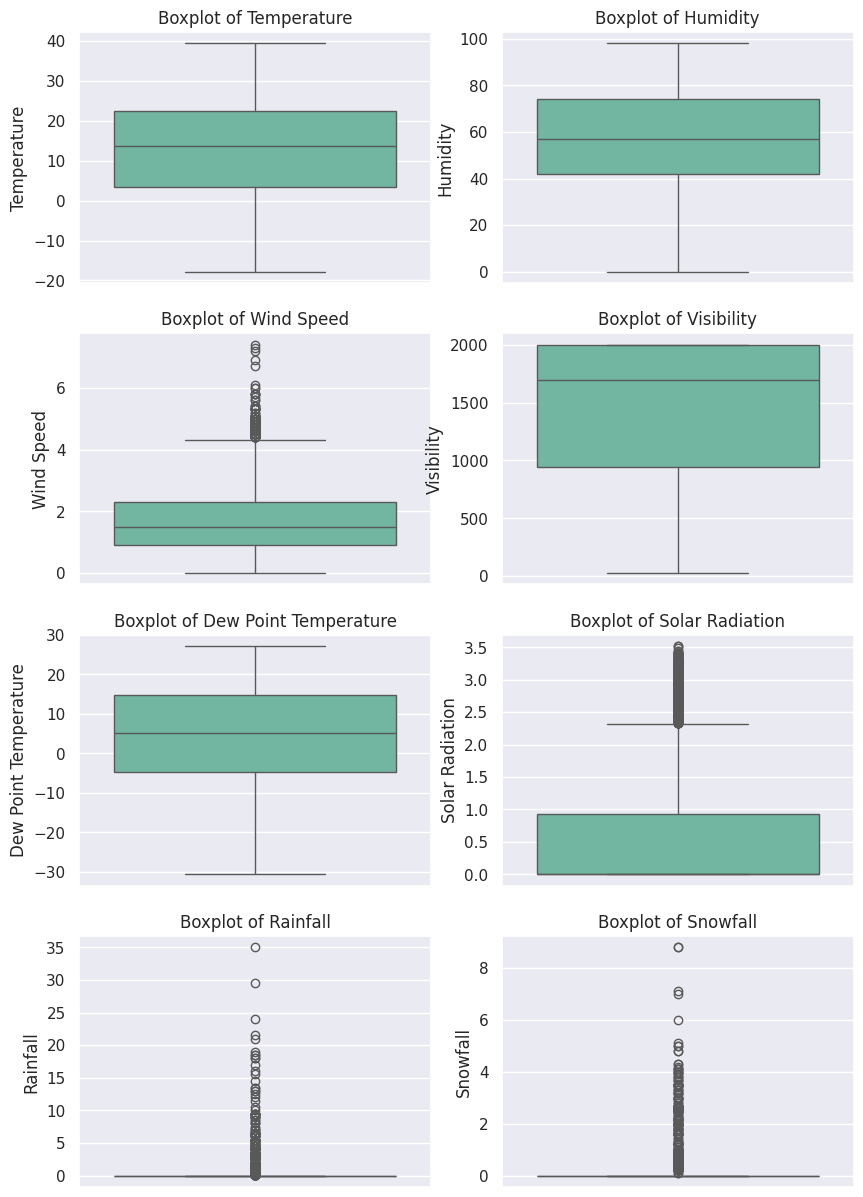

In [346]:
#Boxplot for checking outliers if exists in relevent columns

fig, axs = plt.subplots(4,2, figsize=(10,15))

sns.boxplot(data['Temperature'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Temperature')

sns.boxplot(data['Humidity'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Humidity')


sns.boxplot(data['Wind Speed'], ax=axs[1,0])
axs[1,0].set_title('Boxplot of Wind Speed')

sns.boxplot(data['Visibility'], ax=axs[1,1])
axs[1,1].set_title('Boxplot of Visibility')

sns.boxplot(data['Dew Point Temperature'], ax=axs[2,0])
axs[2,0].set_title('Boxplot of Dew Point Temperature')

sns.boxplot(data['Solar Radiation'], ax=axs[2,1])
axs[2,1].set_title('Boxplot of Solar Radiation')

sns.boxplot(data['Rainfall'], ax=axs[3,0])
axs[3,0].set_title('Boxplot of Rainfall')

sns.boxplot(data['Snowfall'], ax=axs[3,1])
axs[3,1].set_title('Boxplot of Snowfall')

#customize the style and color palette of the plot
sns.set(style='darkgrid', palette='Set2')

plt.show()


We used boxplot method to determine outliers.We can see outliers in independent features like rainfall,snowfall,wind speed,Solar Radiation.
We need to find how far this outliers are.Are they part of anomaly.

In [347]:
#Finding min max values of below columns

data_min_max=data[['Rainfall','Snowfall','Solar Radiation','Wind Speed']].agg(['min','max'])
data_min_max

,Rainfall,Snowfall,Solar Radiation,Wind Speed
min,0.0,0.0,0.00,0.0
max,35.0,8.8,3.52,7.4


Min value for all above features is 0,which quiet possible.Also max values arent that big enough.So we will stick to this values.As we dont want to manipulate results.

In [348]:
data.columns

Index(['Rented Bike Count per Hr', 'Hour', 'Temperature', 'Humidity',
       'Wind Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day',
       'Month', 'Day', 'Year'],
      dtype='object')

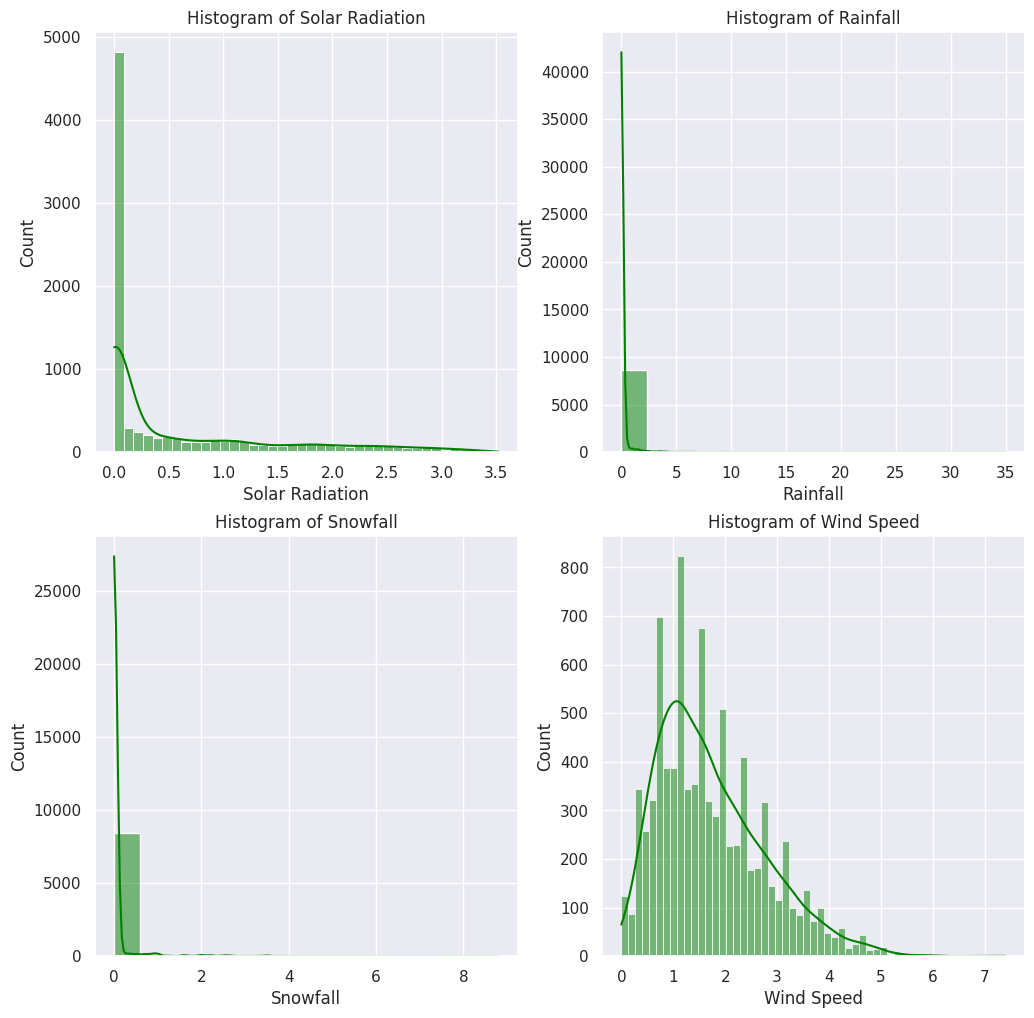

In [349]:
#Histogram of solar radiation

fig, axs = plt.subplots(2,2, figsize=(12,12
                                      ))

sns.histplot(data['Solar Radiation'], kde = True,color='green',ax=axs[0,0])
axs[0,0].set_title('Histogram of Solar Radiation')

sns.histplot(data['Rainfall'], kde = True,color='green',ax=axs[0,1])
axs[0,1].set_title('Histogram of Rainfall')

sns.histplot(data['Snowfall'], kde = True,color='green',ax=axs[1,0])
axs[1,0].set_title('Histogram of Snowfall')

sns.histplot(data['Wind Speed'], kde = True,color='green',ax=axs[1,1])
axs[1,1].set_title('Histogram of Wind Speed')


plt.show()

In [350]:
# Measuting central tendency and dispersion of all relevant columns

data_median=data.median(numeric_only=True)
data_mean=data.mean(numeric_only=True)
data_mean=data_mean.round(2)
data_standard_deviation=data.std(numeric_only=True)
data_standard_deviation.round(2)
data_variance=data.var(numeric_only=True)
data_variance=data_variance.round(2)


matrix_dict={'Mean':data_mean,'Median':data_median,'Std_Deviation':data_standard_deviation,'Variance':data_variance}

dataframe=pd.concat(matrix_dict,axis=1)
dataframe

,Mean,Median,Std_Deviation,Variance
Rented Bike Count per Hr,704.60,504.50,644.997468,416021.73
Hour,11.50,11.50,6.922582,47.92
Temperature,12.88,13.70,11.944825,142.68
Humidity,58.23,57.00,20.362413,414.63
Wind Speed,1.72,1.50,1.036300,1.07
Visibility,1436.83,1698.00,608.298712,370027.32
Dew Point Temperature,4.07,5.10,13.060369,170.57
Solar Radiation,0.57,0.01,0.868746,0.75
Rainfall,0.15,0.00,1.128193,1.27
Snowfall,0.08,0.00,0.436746,0.19


In [351]:
data_encoded=pd.get_dummies(data=data,columns=['Seasons','Holiday','Functioning Day'])
data_encoded


,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,...,Day,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,30,2018,1,0,0,0,0,1,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,30,2018,1,0,0,0,0,1,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,30,2018,1,0,0,0,0,1,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,30,2018,1,0,0,0,0,1,0,1


<Axes: >

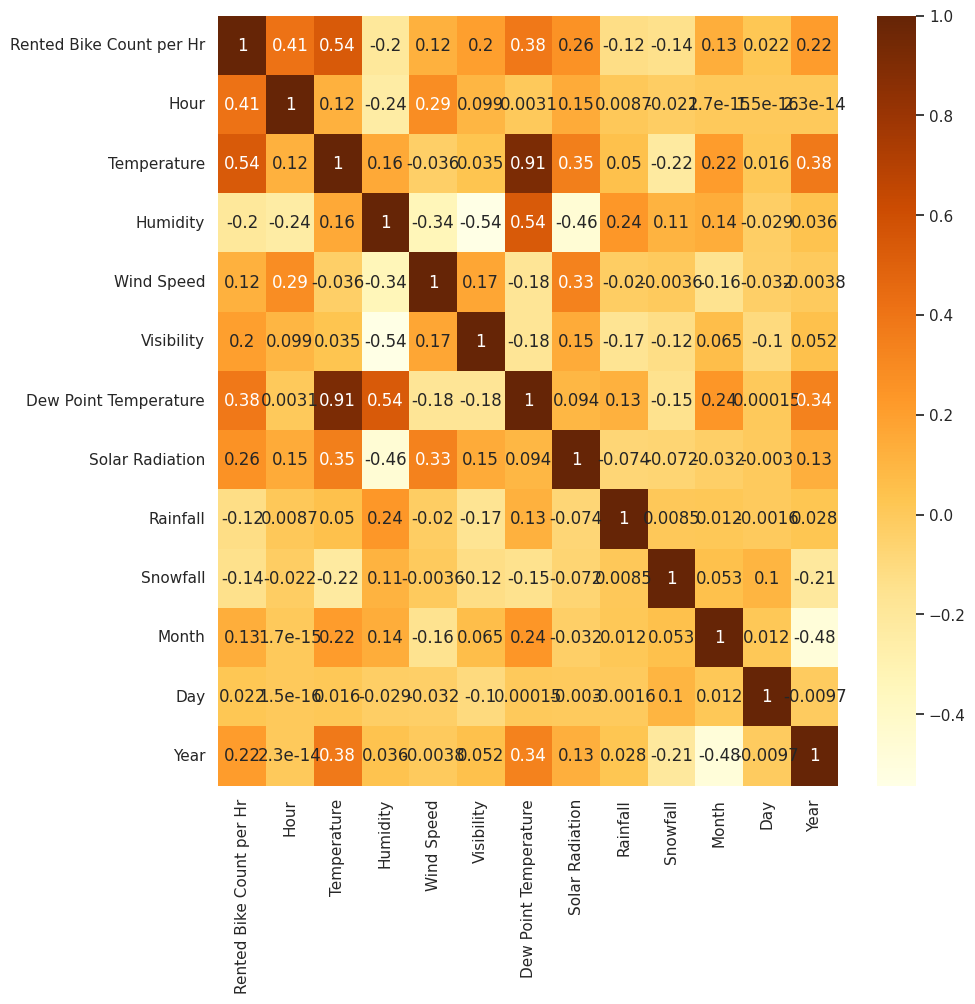

In [352]:
#Correlation matrix

corr=data.corr()

#plotting Heatmap

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap = 'YlOrBr')

In [353]:
#creating user defined funtion

def create_df(column):
    new_df = data[[column, 'Rented Bike Count per Hr']]
    new_df = new_df.groupby(column).sum().reset_index()
    return new_df


In [354]:
#Making dataframe of bikes rented on diffrent time horizons

Bikes_Per_Hr=create_df('Hour')
Bikes_per_Day=create_df('Day')
Bikes_per_month=create_df('Month')
Bikes_per_Year=create_df('Year')
Bikes_Rented_on_different_Seasons=create_df('Seasons')
Bikes_Rented_on_Holidays=create_df('Holiday')


In [355]:
#Defining function to make barplot of number of bikes rented per hr,day,month and year

def make_barplot(dataframe,x,y):
    plt.figure(figsize = (9,6))
    plt.bar(dataframe[x],dataframe[y],color='#0b215c',edgecolor='black')

    # set the x-tick labels to the values of Hour
    plt.xticks(dataframe[x])

    # add labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Barplot of Rented bikes per {x}')

    return plt.show()

# Exploratory Data Analysis

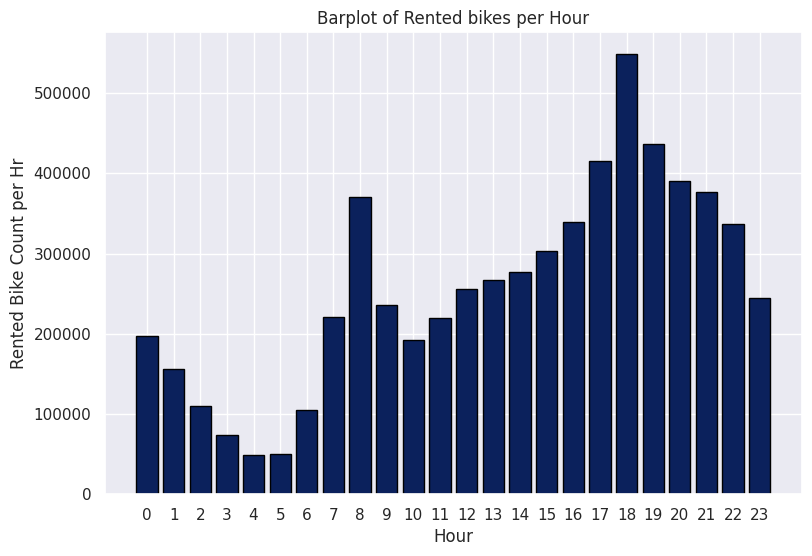

In [356]:
#Plotting Histogram of Hourly rented bikes each hr for both years 2017 and 2018

make_barplot(Bikes_Per_Hr,'Hour','Rented Bike Count per Hr')

Our data reveals a bimodal distribution in bike demand, with a significant surge starting at 10:00 am and peaking at 6:00 pm (18 hours). This suggests a clear opportunity to maximize revenue by concentrating our efforts on optimizing bike availability during this key timeframe, ranging from 8:00 am to 11:00 pm (23 hours).

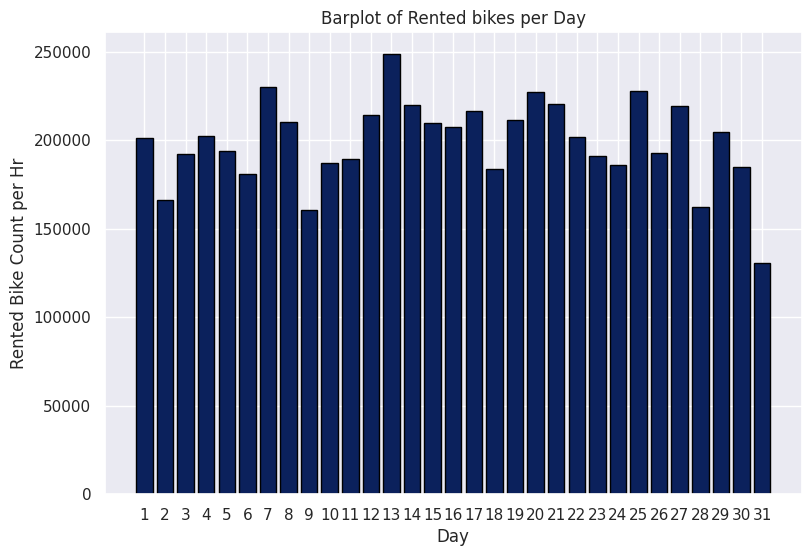

In [357]:
#Plotting Histogram of Hourly rented bikes each day for both years 2017 and 2018

make_barplot(Bikes_per_Day,'Day','Rented Bike Count per Hr')


There are periodical dips after evry 6 days.showing demand for bikes are lower in weekends compared to weekdays.

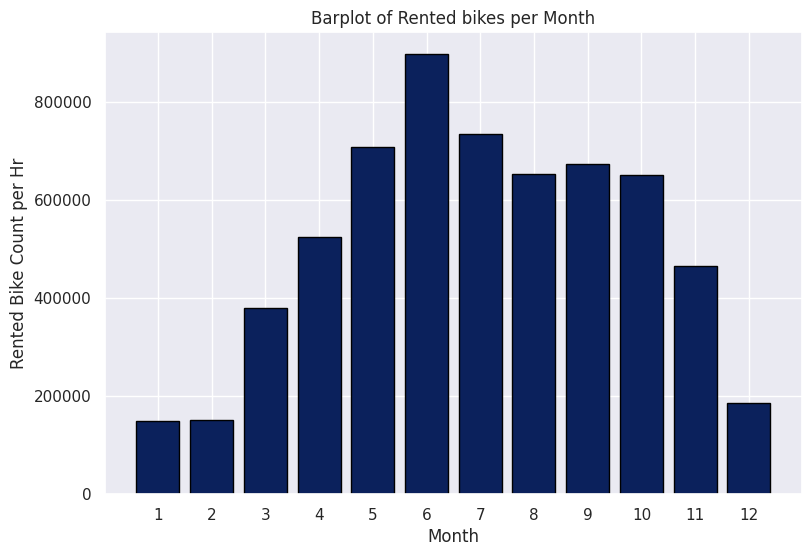

In [358]:
# #Plotting Histogram of Hourly rented bikes each month for both years 2017 and 2018

make_barplot(Bikes_per_month,'Month','Rented Bike Count per Hr')

We observe a distinct seasonality in bike demand, with the lowest utilization during the winter months (December-February). This coincides with the holiday season, suggesting that vacation travel leads to a natural dip in ridership. Demand begins to recover in March, gradually building momentum until it reaches its peak from May to October. This extended period of high demand presents a crucial opportunity for maximizing ridership and revenue.

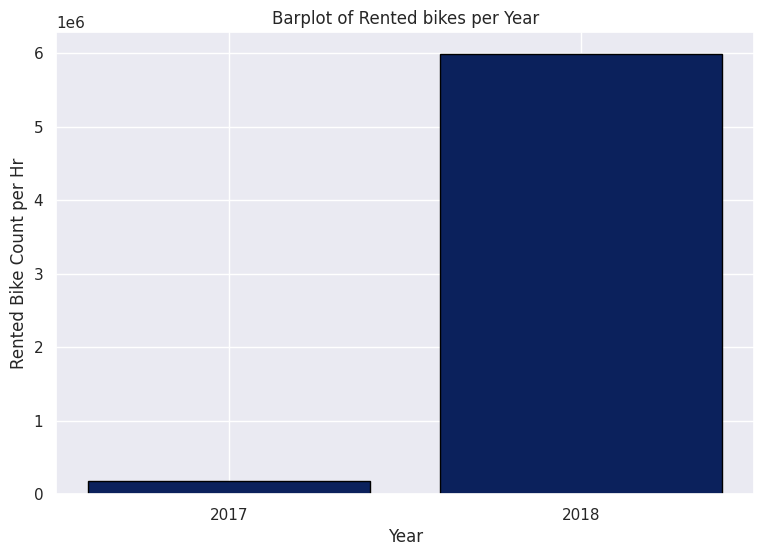

In [359]:
#Plotting Histogram of Hourly rented bikes each year

make_barplot(Bikes_per_Year,'Year','Rented Bike Count per Hr')

In stark contrast to the sluggish demand experienced in 2017, bicycle ridership witnessed a remarkable upswing in 2018.There can e many reasons for this surge.
this may include cheaper bikes,goverenment incentive,Increased price of gasoline and may more.

In [360]:
#Calculating bikes rented on non functionig Days

Bikes_Rented_on_Functioning_Days=data.groupby('Functioning Day').sum()
Bikes_Rented_on_Functioning_Days=Bikes_Rented_on_Functioning_Days['Rented Bike Count per Hr']
print(Bikes_Rented_on_Functioning_Days)

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count per Hr, dtype: int64


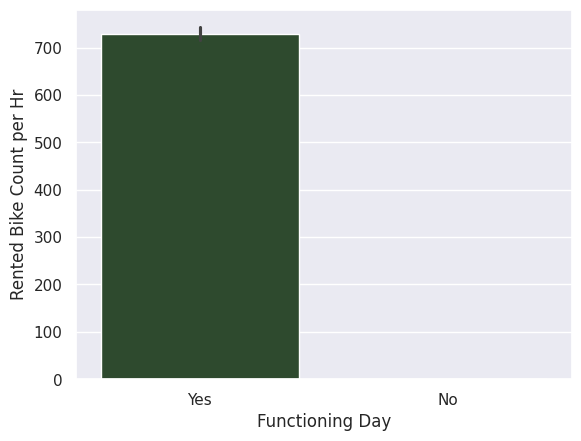

In [361]:
#Plotting Barplot of Bikes rented on functioning vs Non Functioning Days

sns.barplot(x = 'Functioning Day', y = 'Rented Bike Count per Hr', data =data,color='#294f29')
plt.show()

There is no demand for rental bikes in non functioning days.
Folks want to use car or public transport service on non functionig days.
Peope only use bikes for going to workplaces and dont want to use for any other use.

Buisness need to factor in this mindset.and staregise accordingly.
Consider offering diverse bike types (leisure bikes, cargo bikes) and flexible rental packages (multi-day passes, family plans) to cater to a wider range of needs.
Explore collaborations with local attractions, businesses, or event organizers to promote bike rentals as part of leisure activities or errand trips.

In [362]:
data.columns

Index(['Rented Bike Count per Hr', 'Hour', 'Temperature', 'Humidity',
       'Wind Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day',
       'Month', 'Day', 'Year'],
      dtype='object')

In [363]:
#Defining function to make barplot of number of bikes rented per hr,day,month and year

def make_histplot(dataframe,x):
    plt.figure(figsize = (9,6))
    sns.histplot(dataframe[x],color='green',kde=True,edgecolor='black')

    # add labels and title
    plt.xlabel(x)
    plt.title(f'Histogram of Bikes rented on differnt {x}')

    return plt.show()

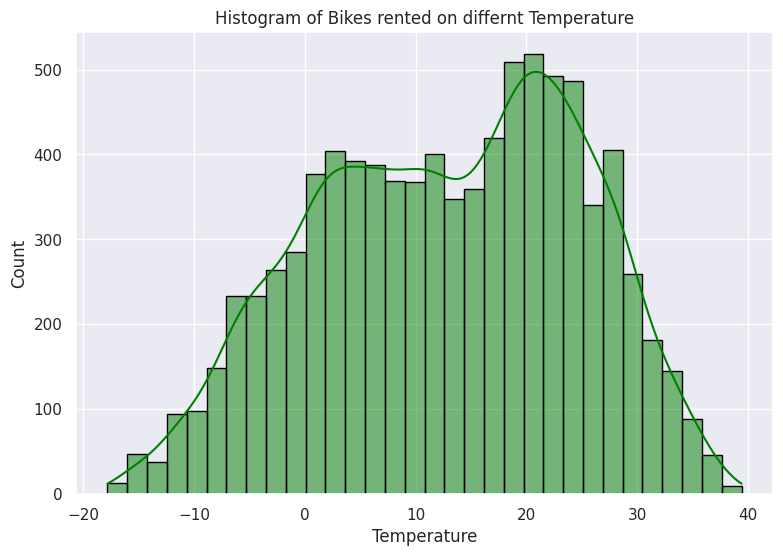

In [364]:
#Histogram for bikes rented on differnt temperature in the day
make_histplot(data,'Temperature')

If temperature is below 0 degrees and more than 30 degress folks dont prefer renting bikes.They perfere other public services for going to workplaces.


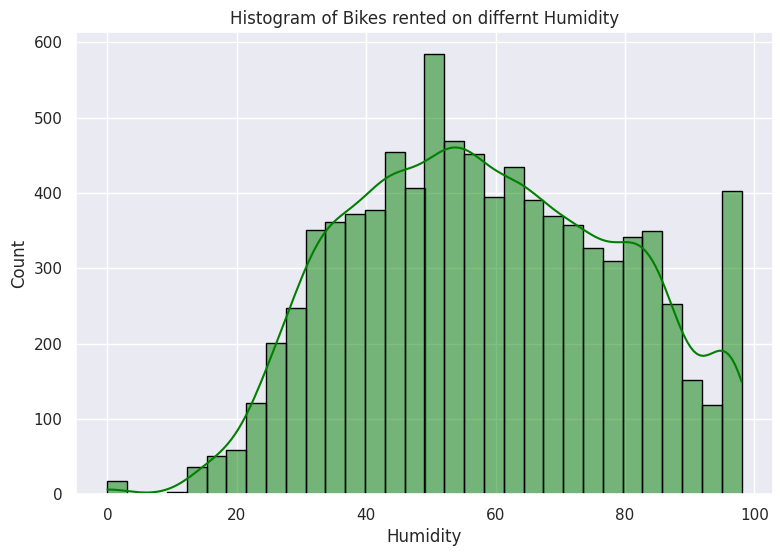

In [365]:
#Histogram for bikes rented on differnt temperature in the day

make_histplot(data,'Humidity')

Humidity between 25 to 85 is good with respect to bike demand.anyting other does not work in favor.

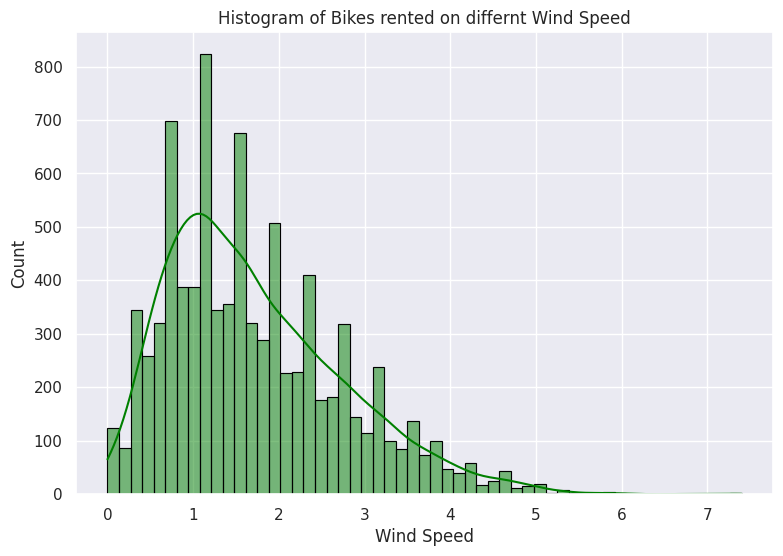

In [366]:
#Histogram for bikes rented on differnt temperature in the day

make_histplot(data,'Wind Speed')

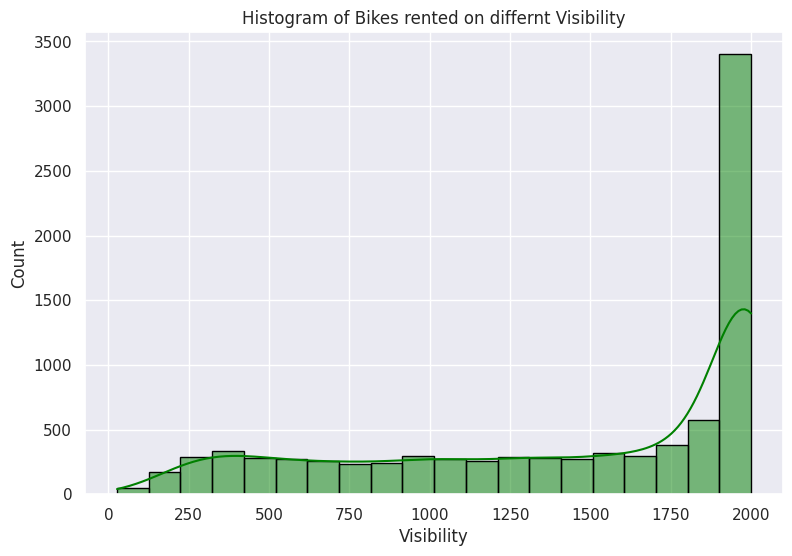

In [367]:
#Histogram for bikes rented on differnt temperature in the day

make_histplot(data,'Visibility')

Our data reveals a fascinating correlation between bike rental demand and prevailing visibility conditions. Notably, a marked inflection point emerges at 1800 meters of visibility. Above this threshold, demand surges dramatically, indicating a strong preference for cycling when weather conditions offer clear sightlines. Conversely, when visibility dips below 1800 meters, demand remains relatively stable, suggesting alternative transportation options hold sway in periods of reduced clarity.

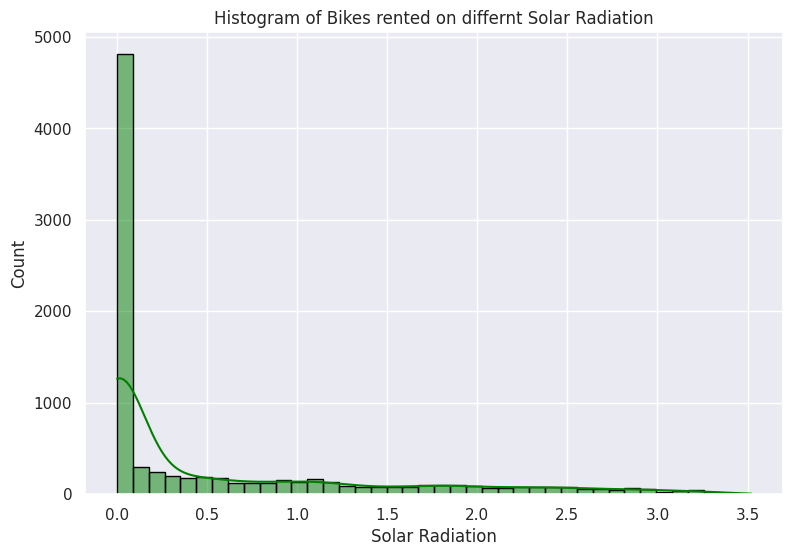

In [368]:
# Histogram for bikes rented on differnt temperature in the day
make_histplot(data,'Solar Radiation')

Our data unveils a captivating interplay between bike rental demand and solar radiation. Notably, a distinct tipping point emerges at 0.1 megajoules per square meter (MJ/m²) of solar radiation. Beyond this threshold, demand experiences a precipitous decline, suggesting a remarkable sensitivity to environmental conditions. This observation opens up intriguing avenues for strategic adaptation and market expansion.

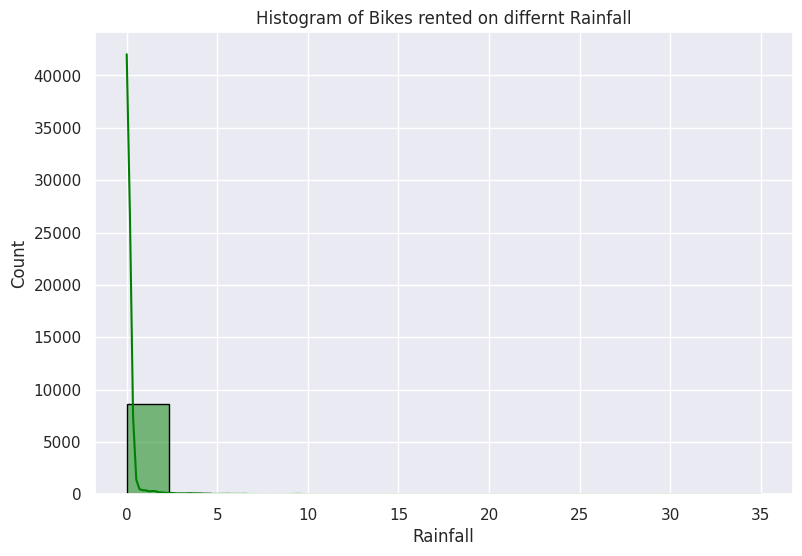

In [369]:
# Histogram for bikes rented on differnt temperature in the day

make_histplot(data,'Rainfall')


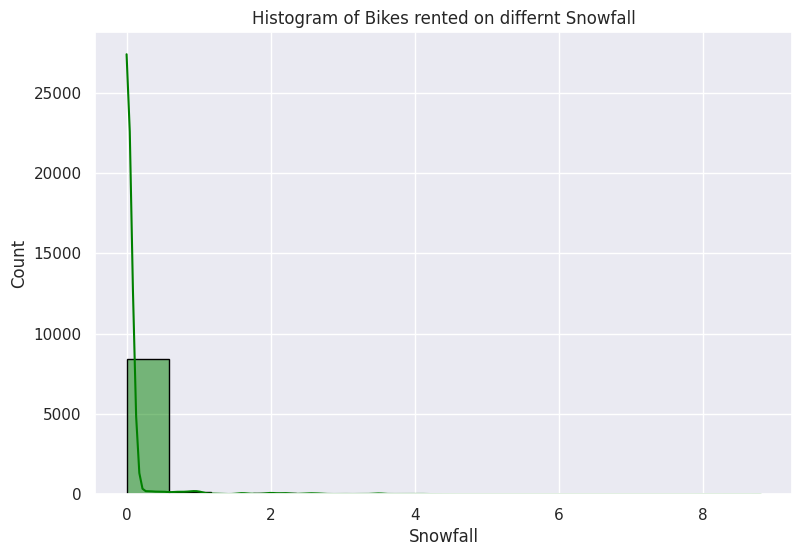

In [370]:
# Histogram for bikes rented on differnt temperature in the day

make_histplot(data,'Snowfall')


It is self-evident that the demand for rental bikes diminishes significantly in the presence of adverse weather conditions such as rainfall or snowfall. Our empirical data underscores the profound sensitivity of bike rental demand to environmental factors, including but not limited to rainfall, snowfall, and solar radiation.

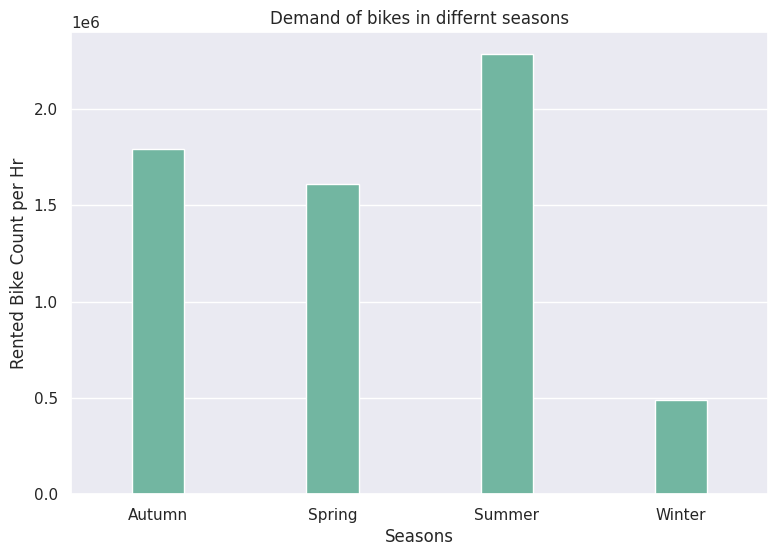

In [371]:
#Demand of bikes in differnt seasons

plt.figure(figsize = (9,6))

sns.barplot(x ='Seasons', y = 'Rented Bike Count per Hr',data = Bikes_Rented_on_different_Seasons,width=0.3)

plt.title('Demand of bikes in differnt seasons')

# show the plot
plt.show()

The zenith of bike demand materializes during the summer season, succeeded by autumn and spring in descending order of magnitude. Notably, the winter season witnesses a striking 80 percent reduction in bike demand when juxtaposed with the summertime peak.

<ipython-input-372-1a1e50612c7d>:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x ='Holiday', y = 'Rented Bike Count per Hr',data = Bikes_Rented_on_Holidays,width=0.3,palette=palette)


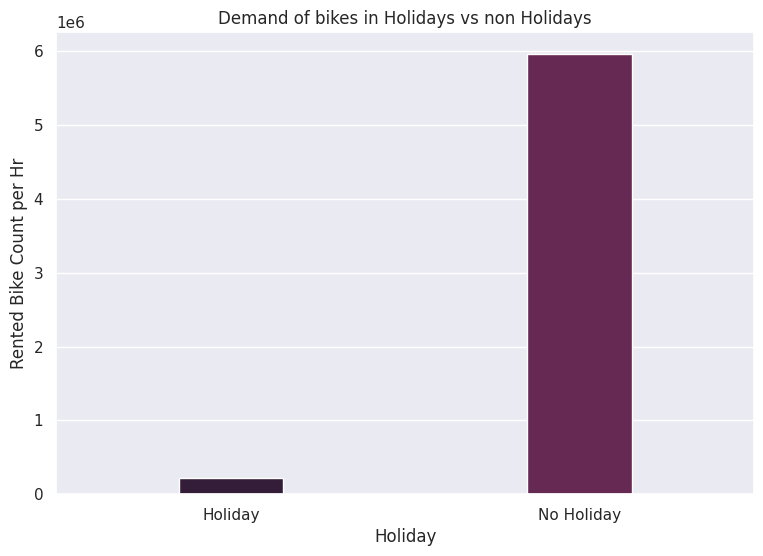

In [372]:
#Demand of bikes in Holidays vs non Holidays

plt.figure(figsize = (9,6))

palette=sns.color_palette("rocket")

sns.barplot(x ='Holiday', y = 'Rented Bike Count per Hr',data = Bikes_Rented_on_Holidays,width=0.3,palette=palette)

plt.title('Demand of bikes in Holidays vs non Holidays')

# show the plot
plt.show()

Relative to non-holiday periods, there exists a notably diminished demand for rental bikes during holiday periods.

In [373]:
data

,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Day,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018


In [374]:
max_hrly_demand_per_season=data.groupby(['Seasons','Holiday']).sum('Rented Bike Count per Hr')
max_hrly_demand_per_season=max_hrly_demand_per_season.reset_index()
max_hrly_demand_per_season=max_hrly_demand_per_season.loc[:,['Seasons','Holiday','Rented Bike Count per Hr']]
max_hrly_demand_per_season


,Seasons,Holiday,Rented Bike Count per Hr
0,Autumn,Holiday,91018
1,Autumn,No Holiday,1698984
2,Spring,Holiday,45742
3,Spring,No Holiday,1566167
4,Summer,Holiday,49063
5,Summer,No Holiday,2234171
6,Winter,Holiday,30072
7,Winter,No Holiday,457097


In [375]:
df_sorted=max_hrly_demand_per_season.sort_values(by='Rented Bike Count per Hr',ascending=False)
df_sorted

,Seasons,Holiday,Rented Bike Count per Hr
5,Summer,No Holiday,2234171
1,Autumn,No Holiday,1698984
3,Spring,No Holiday,1566167
7,Winter,No Holiday,457097
0,Autumn,Holiday,91018
4,Summer,Holiday,49063
2,Spring,Holiday,45742
6,Winter,Holiday,30072


<Figure size 900x600 with 0 Axes>

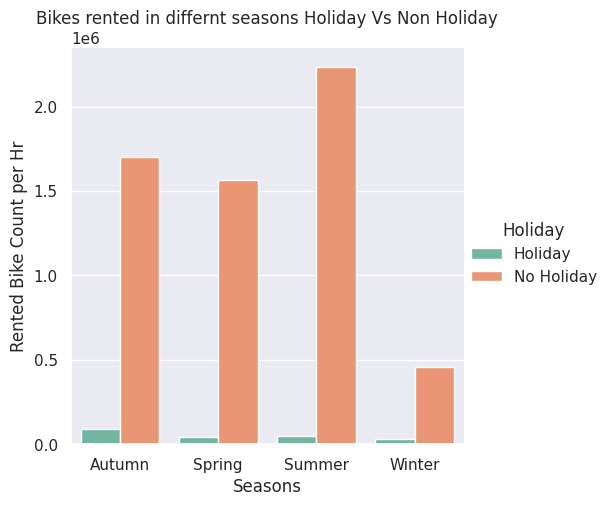

In [376]:
# Bikes rented in differnt seasons Holiday Vs Non Holiday

plt.figure(figsize = (9,6))

sns.catplot(data=max_hrly_demand_per_season,x='Seasons',y='Rented Bike Count per Hr',hue='Holiday',kind='bar')

plt.title('Bikes rented in differnt seasons Holiday Vs Non Holiday')

plt.show()

While the pinnacle of bike demand occurs during the summer in non-holiday seasons, during holiday periods, the demand for bikes ascends to its zenith in autumn, surpassing other seasons in magnitude.

In [377]:
df=pd.get_dummies(data,columns=['Holiday','Seasons','Functioning Day','Hour'],drop_first=True)
df

,Rented Bike Count per Hr,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Month,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,...,0,0,0,0,0,1,0,0,0,0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,...,0,0,0,0,0,0,1,0,0,0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,...,0,0,0,0,0,0,0,1,0,0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,...,0,0,0,0,0,0,0,0,1,0


In [378]:
X=data.iloc[:,2:]


In [379]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [380]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature,187.663531
1,Humidity,187.133265
2,Wind Speed,4.603728
3,Visibility,10.694657
4,Dew Point Temperature,126.713900
5,Solar Radiation,2.847789
6,Rainfall,1.100530
7,Snowfall,1.152891
8,Month,5.102383
9,Day,4.376979


In [425]:
for column in ['Hour','Dew Point Temperature','Humidity','Solar Radiation','Year','Month', 'Day']:
    if column not in data.columns:
        print(f"Column '{column}' not found in the DataFrame")
    else:
      print('Columns avialbel in Dataframe')

Columns avialbel in Dataframe
Columns avialbel in Dataframe
Columns avialbel in Dataframe
Columns avialbel in Dataframe
Columns avialbel in Dataframe
Columns avialbel in Dataframe
Columns avialbel in Dataframe


In [428]:
data=data.drop(['Dew Point Temperature','Humidity','Solar Radiation','Year'],axis=1)

In [429]:
#Get dummies for columns Hour,Seasons,Holiday,Functioning Day

data_encoded=pd.get_dummies(data=data,columns=['Hour','Seasons','Holiday','Functioning Day','Month','Day'])

data_encoded

,Rented Bike Count per Hr,Temperature,Wind Speed,Visibility,Rainfall,Snowfall,Hour_0,Hour_1,Hour_2,Hour_3,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,254,-5.2,2.2,2000,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,0.8,2000,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,1.0,2000,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,0.9,2000,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,2.3,2000,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,2.6,1894,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8756,764,3.4,2.3,2000,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8757,694,2.6,0.3,1968,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8758,712,2.1,1.0,1859,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [430]:
data_encoded.columns

Index(['Rented Bike Count per Hr', 'Temperature', 'Wind Speed', 'Visibility',
       'Rainfall', 'Snowfall', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning Day_No', 'Functioning Day_Yes', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Day_1', 'Day_2',
       'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8', 'Day_9', 'Day_10',
       'Day_11', 'Day_12', 'Day_13', 'Day_14', 'Day_15', 'Day_16', 'Day_17',
       'Day_18', 'Day_19', 'Day_20', 'Day_21', 'Day_22', 'Day_23', 'Day_24',
       'Day_25', 'Day_26', 'Day_27',

In [432]:
#Dropping dew point temprature as there is colinearity between temparature and Dew Point temperature

# print(f'Shape before droping Dew Point Tempertaure Column {data_encoded.shape}')

# data_encoded=data_encoded.drop(['Dew Point Temperature'],axis=1)

# print(f'Shape after droping Dew Point Tempertaure Column {data_encoded.shape}')

# Observation

<b>Peak Demand Hours: Bike demand exhibits a bimodal distribution, with a significant surge starting at 10:00 am and peaking at 6:00 pm (18 hours), emphasizing the importance of optimizing bike availability from 8:00 am to 11:00 pm (23 hours).

Weekly Patterns: Periodical dips every 6 days indicate lower bike demand on weekends compared to weekdays, suggesting a need for tailored strategies for different days of the week.

Seasonal Variation: Distinct seasonality in bike demand is observed, with the lowest utilization during winter (December-February) coinciding with the holiday season. Demand gradually recovers in March, reaching its peak from May to October.

Yearly Trends: A significant upswing in bicycle ridership is noted in 2018 compared to the sluggish demand experienced in 2017, with potential factors including cheaper bikes, government incentives, and increased gasoline prices.

Weekend Preferences: No demand for rental bikes on non-functioning days, as people prefer cars or public transport. Bikes are primarily used for commuting to workplaces.

Diversification Strategy: To cater to varied needs, consider offering diverse bike types (leisure bikes, cargo bikes) and flexible rental packages (multi-day passes, family plans). Collaborate with local attractions or businesses to promote bike rentals for leisure activities.

Temperature Sensitivity: Bike rental demand is influenced by temperature, with preferences against renting bikes below 0 degrees

# Data Modelling

In [433]:
#Splitting dataset in training and testing data

x_train, x_test, y_train, y_test = train_test_split(data_encoded.iloc[:,1:],data_encoded.iloc[:,0], test_size=0.33, random_state=42)

In [434]:
#Shape of testing and trainig data

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5869, 80), (5869,), (2891, 80), (2891,))

In [435]:
#Standardising features for similar scale

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)

x_test=scaler.transform(x_test)


print(x_train)
print("\n")
print(f"shape of trainig data is {x_train.shape}")
print("\n")
print('*'*80)
print("\n")
print(x_test)
print("\n")
print(f"shape of testing data is {x_test.shape}")

[[-1.28690278  1.60949463  0.83450012 ... -0.17838548 -0.17838548
  -0.13627157]
 [-1.39618552  1.89975164 -0.26367143 ... -0.17838548 -0.17838548
  -0.13627157]
 [ 1.01644101 -1.19632309  0.74271265 ... -0.17838548 -0.17838548
  -0.13627157]
 ...
 [ 1.38632104  0.93222829  0.82466575 ... -0.17838548 -0.17838548
  -0.13627157]
 [-1.37937279 -0.61580908 -0.07681836 ... -0.17838548 -0.17838548
  -0.13627157]
 [ 0.52887189 -1.19632309  0.92137041 ...  5.60583753 -0.17838548
  -0.13627157]]


shape of trainig data is (5869, 80)


********************************************************************************


[[ 1.19297466  0.06145727  0.91973135 ... -0.17838548 -0.17838548
  -0.13627157]
 [ 1.64691833  0.35171427 -1.04550402 ... -0.17838548 -0.17838548
  -0.13627157]
 [ 1.76460743 -0.51905674  0.50177053 ... -0.17838548 -0.17838548
  -0.13627157]
 ...
 [ 0.56249734 -0.61580908 -1.54213981 ... -0.17838548 -0.17838548
  -0.13627157]
 [ 0.3607446  -1.00281842  0.92137041 ... -0.17838548  5

In [436]:
#Finding correlation between Target and independent features

correlation_df=data_encoded.corr()
correlation_df=correlation_df['Rented Bike Count per Hr']
correlation_df=correlation_df.reset_index()
correlation_df=correlation_df.rename(columns={'index':'Column_names','Rented Bike Count per Hr':'Correlation'})
correlation_df

,Column_names,Correlation
0,Rented Bike Count per Hr,1.000000
1,Temperature,0.538558
2,Wind Speed,0.121108
3,Visibility,0.199280
4,Rainfall,-0.123074
...,...,...
76,Day_27,0.016355
77,Day_28,-0.040396
78,Day_29,0.018954
79,Day_30,-0.001285


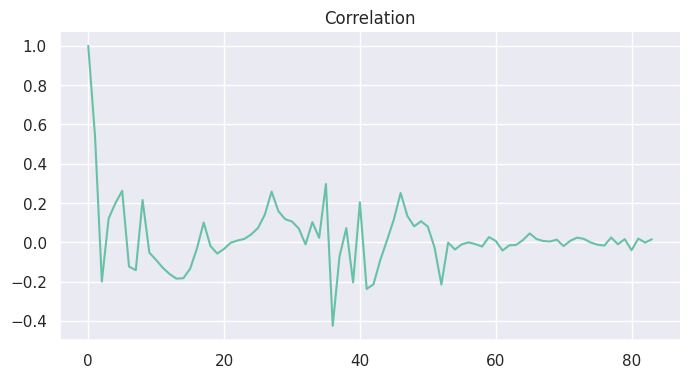

In [427]:
# @title Correlation

from matplotlib import pyplot as plt
correlation_df['Correlation'].plot(kind='line', figsize=(8, 4), title='Correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

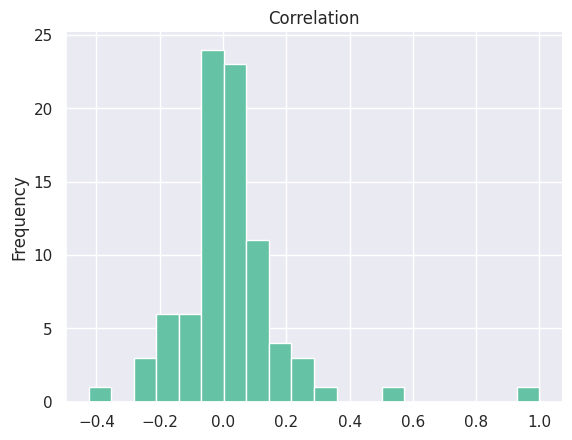

In [426]:
# @title Correlation

from matplotlib import pyplot as plt
correlation_df['Correlation'].plot(kind='hist', bins=20, title='Correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [437]:
def show_evaluation_metrics(y_test,y_pred):
        r_square=r2_score(y_test,y_pred)*100
        print(f'R square of model is {round(r_square,2)}')

        Adjusted_r_square=1 - (1-r_square)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
        print(f'Adjusted_r_square of model is {round(Adjusted_r_square,2)}')

        MAE=mean_absolute_error(y_test, y_pred)
        print(f'Mean Absolute Error of model is {round(MAE,2)}')

        MSE=mean_squared_error(y_test,y_pred)
        print(f'Mean Squared Error of model is {round(MSE,2)}')

        RMSE=MSE**0.5
        print(f'Root Mean Squared Error of model is {round(RMSE,2)}')

        accuracies = cross_val_score(estimator = linreg, X = x_train, y = y_train, cv =5)
        print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
        print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

        print("\n")

        pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
        print(pred_df[:10])

        print("\n")

        plt.figure(figsize = (9,6))
        sns.regplot(x=y_test,y=y_pred,scatter_kws={"color": "green"},line_kws={'color':'red'}, marker="x")
        plt.xlabel("y_test")
        plt.ylabel("y_predict")
        plt.title("Scatterplot of y_test vs y_predict")
        return plt.show()


In [438]:
def calc_adjusted_R2(y_test,y_pred):
    r_square=r2_score(y_test,y_pred)*100
    Adjusted_r_square=1 - (1-r_square)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    return Adjusted_r_square


#Multilinear Regression

In [439]:
#Multiple linear regression
linreg=LinearRegression()

#Fitting the model
linreg.fit(x_train,y_train)

#Prediciting bike rental duration
y_pred=linreg.predict(x_test)

R square of model is 66.38
Adjusted_r_square of model is 68.25
Mean Absolute Error of model is 281.39
Mean Squared Error of model is 139178.08
Root Mean Squared Error of model is 373.07
Cross Val Accuracy: 67.94 %
Cross Val Standard Deviation: 1.54 %


      Actual Value  Predicted Value  Difference
6056          1728      1254.328545  473.671455
5556           822       973.328545 -151.328545
5990           658       946.328545 -288.328545
7674          2716      1815.328545  900.671455
3319          1083       574.328545  508.671455
5761           636       797.578545 -161.578545
5972          1537      1378.328545  158.671455
8758           712       946.578545 -234.578545
6079           425       942.328545 -517.328545
7177           594       762.578545 -168.578545




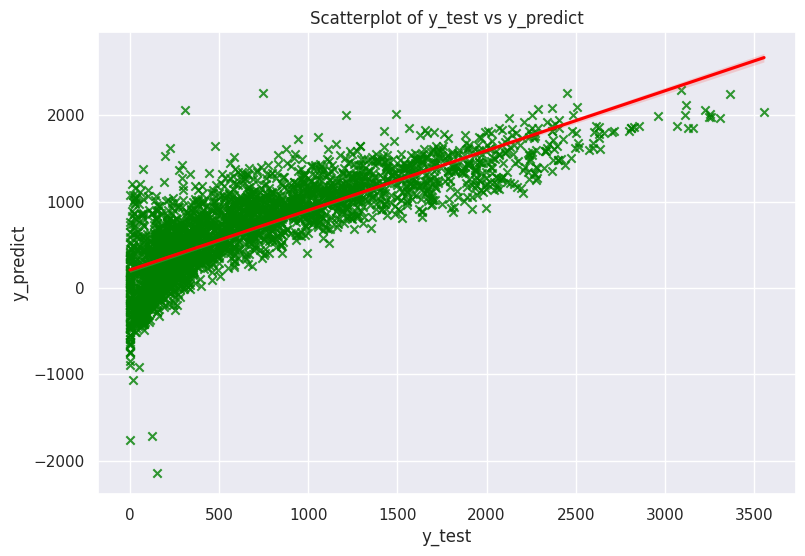

In [440]:
#Comparison of differtnt metrics for multilinear regressison
show_evaluation_metrics(y_test,y_pred)

In [441]:
#Calculate Adjusted R square for Multilinear Regression
multilinear_regression=calc_adjusted_R2(y_test,y_pred)
multilinear_regression

68.24612691298009

#Polynomial Regression

In [442]:
# Fitting Polynomial Regression to the dataset

poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()

#Transforming X train and  fitting new x train to linear regression model
model.fit(poly_reg.fit_transform(x_train),y_train)

#Predicting target variables
y_pred=model.predict(poly_reg.fit_transform(x_test))



R square of model is 54.42
Adjusted_r_square of model is 55.94
Mean Absolute Error of model is 200.2
Mean Squared Error of model is 188733.37
Root Mean Squared Error of model is 434.43
Cross Val Accuracy: 67.94 %
Cross Val Standard Deviation: 1.54 %


      Actual Value  Predicted Value  Difference
6056          1728        944.46875   783.53125
5556           822        928.81250  -106.81250
5990           658        922.75000  -264.75000
7674          2716       2285.90625   430.09375
3319          1083        792.15625   290.84375
5761           636        370.65625   265.34375
5972          1537       1663.87500  -126.87500
8758           712        739.34375   -27.34375
6079           425        952.68750  -527.68750
7177           594        588.78125     5.21875




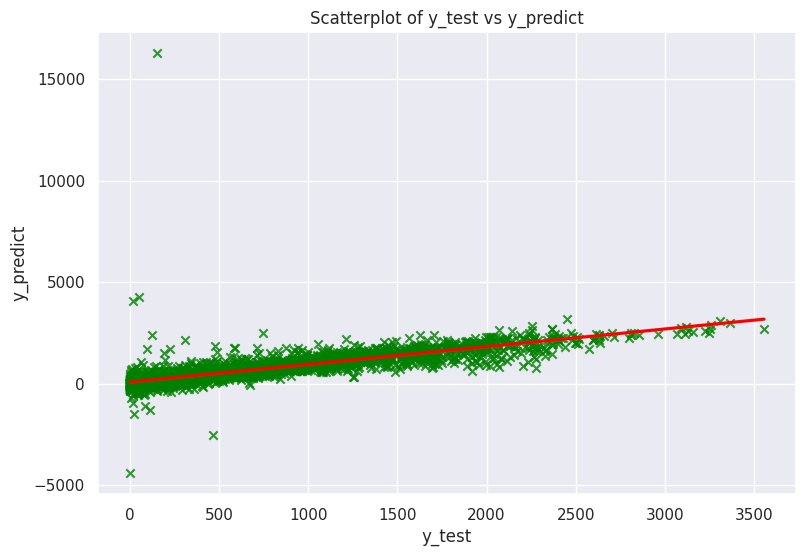

In [443]:
#Comparison of differtnt metrics for multilinear regressison
show_evaluation_metrics(y_test,y_pred)

In [444]:
#Calculate Adjusted R square for Ploynomial Regression
Polynomial_regression=calc_adjusted_R2(y_test,y_pred)
Polynomial_regression

55.93640001332949

#Ridge Regression

In [445]:
#Ridge Regression

#Hyperparameter tuning for choosing best parameters

param_grid={'alpha':[1.0,5.0,7.0,10.0,20.0,30.0],'solver':['auto','svd','lsqr','saga']}

ridge_regression_model=Ridge()

ridge_regression_model_grid=GridSearchCV(estimator=ridge_regression_model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=10)

#Fitting model over training Data
ridge_regression_model_grid.fit(x_test,y_test)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 5.0, 7.0, 10.0, 20.0, 30.0],
                         'solver': ['auto', 'svd', 'lsqr', 'saga']})

In [446]:
print("Best parameters are:",ridge_regression_model_grid.best_params_)

Best parameters are: {'alpha': 5.0, 'solver': 'lsqr'}


In [447]:
#Predicting target variables
y_pred=ridge_regression_model_grid.predict(x_test)
y_pred

array([1497.26144007,  978.55914572,  992.99161003, ...,  739.92971438,
       -189.43309803, 1066.64588313])

R square of model is 69.06
Adjusted_r_square of model is 71.0
Mean Absolute Error of model is 269.86
Mean Squared Error of model is 128092.54
Root Mean Squared Error of model is 357.9
Cross Val Accuracy: 67.94 %
Cross Val Standard Deviation: 1.54 %


      Actual Value  Predicted Value  Difference
6056          1728      1497.261440  230.738560
5556           822       978.559146 -156.559146
5990           658       992.991610 -334.991610
7674          2716      1781.417938  934.582062
3319          1083       619.568870  463.431130
5761           636       881.211773 -245.211773
5972          1537      1352.061001  184.938999
8758           712       945.137578 -233.137578
6079           425       955.699353 -530.699353
7177           594       688.855770  -94.855770




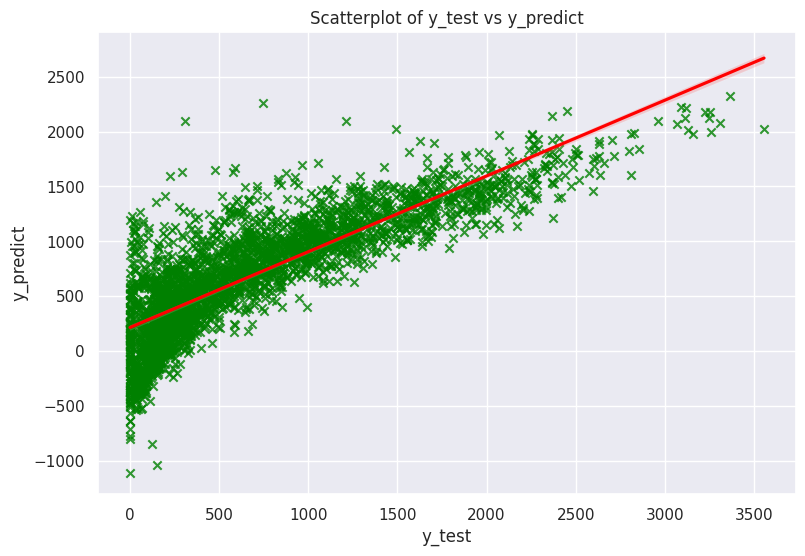

In [448]:
#Comparison of differtnt metrics for multilinear regressison
show_evaluation_metrics(y_test,y_pred)

In [449]:
#Calculate Adjusted R square for Ridge Regression
Ridge_regression=calc_adjusted_R2(y_test,y_pred)
Ridge_regression

70.99981750143246

#Lasso Regression

In [450]:
#Lasso Regression

#Hyperparameter tuning for choosing best parameters

param_grid={'alpha':[1.0,5.0,7.0,10.0,20.0,30.0],'random_state':[42],'max_iter':[2000]}

Lasso_regression_model=Lasso()

Lasso_regression_model_grid=GridSearchCV(estimator=Lasso_regression_model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)

#Fitting model over training Data
Lasso_regression_model_grid.fit(x_test,y_test)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 5.0, 7.0, 10.0, 20.0, 30.0],
                         'max_iter': [2000], 'random_state': [42]})

In [451]:
print("Best parameters are:",Lasso_regression_model_grid.best_params_)

Best parameters are: {'alpha': 1.0, 'max_iter': 2000, 'random_state': 42}


In [452]:
#Predicting target variables
y_pred=Lasso_regression_model_grid.predict(x_test)
y_pred

array([1489.50131926,  984.44593237,  996.29157356, ...,  750.10354488,
       -183.35442528, 1070.10123613])

R square of model is 69.04
Adjusted_r_square of model is 70.98
Mean Absolute Error of model is 269.62
Mean Squared Error of model is 128174.81
Root Mean Squared Error of model is 358.02
Cross Val Accuracy: 67.94 %
Cross Val Standard Deviation: 1.54 %


      Actual Value  Predicted Value  Difference
6056          1728      1489.501319  238.498681
5556           822       984.445932 -162.445932
5990           658       996.291574 -338.291574
7674          2716      1779.867331  936.132669
3319          1083       616.984571  466.015429
5761           636       879.919229 -243.919229
5972          1537      1343.189021  193.810979
8758           712       931.225031 -219.225031
6079           425       946.221283 -521.221283
7177           594       701.614804 -107.614804




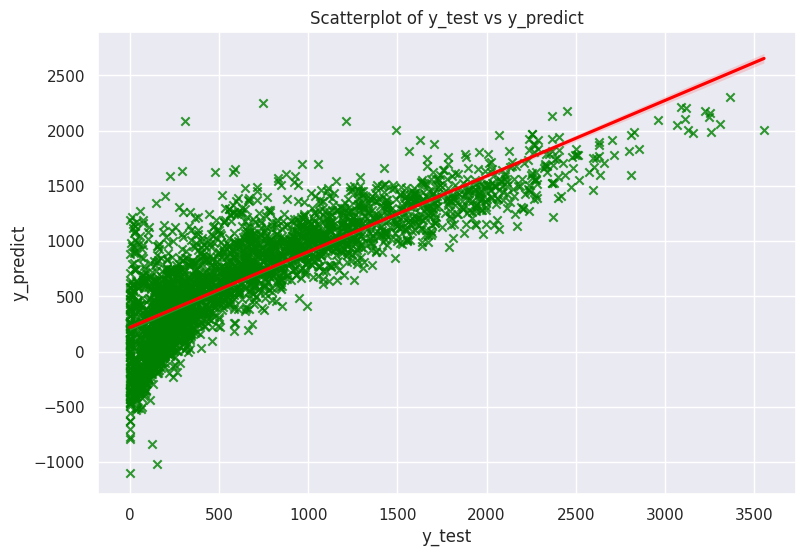

In [453]:
#Comparison of differtnt metrics for Lasso regressison
show_evaluation_metrics(y_test,y_pred)

In [454]:
#Calculate Adjusted R square for Lasso Regression
Lasso_regression=calc_adjusted_R2(y_test,y_pred)
Lasso_regression

70.97938268316257

# Elastic Net Model

In [455]:
#Elastic Net Model

elastic_net_model=ElasticNet()

param_grid={'alpha':[1.0,5.0,7.0,10.0,20.0,30.0],'random_state':[42],'max_iter':[2000],'l1_ratio':[0.3,0.5,0.7]}

#Fitting model over training Data

elastic_net_model_grid=GridSearchCV(estimator=elastic_net_model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)

elastic_net_model_grid.fit(x_test,y_test)

#Predicting target variables
y_pred=elastic_net_model_grid.predict(x_test)




R square of model is 65.62
Adjusted_r_square of model is 67.46
Mean Absolute Error of model is 279.48
Mean Squared Error of model is 142330.14
Root Mean Squared Error of model is 377.27
Cross Val Accuracy: 67.94 %
Cross Val Standard Deviation: 1.54 %


      Actual Value  Predicted Value   Difference
6056          1728      1356.585065   371.414935
5556           822      1009.277249  -187.277249
5990           658       998.472519  -340.472519
7674          2716      1568.600888  1147.399112
3319          1083       650.708090   432.291910
5761           636       845.874056  -209.874056
5972          1537      1242.670356   294.329644
8758           712       892.878824  -180.878824
6079           425       888.395465  -463.395465
7177           594       748.864149  -154.864149




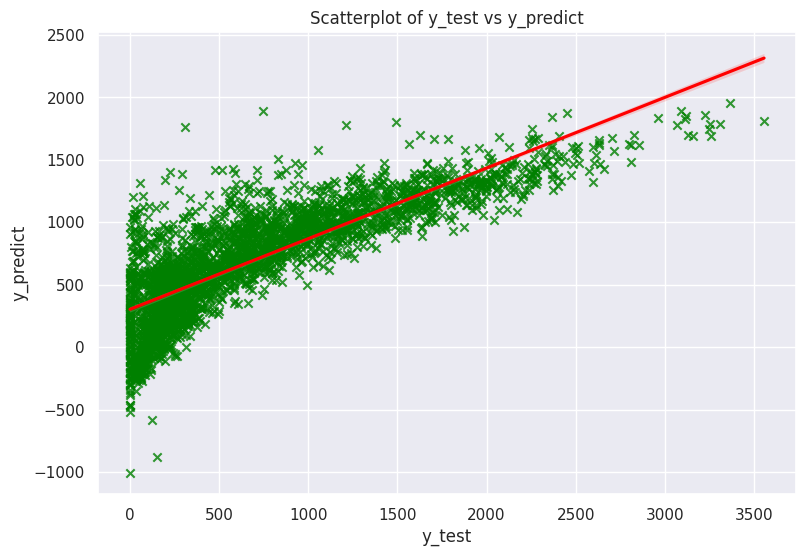

In [456]:
#Comparison of differtnt metrics for Lasso regressison
show_evaluation_metrics(y_test,y_pred)

In [408]:
#Calculate Adjusted R square for Elastic Net Regression
Elastic_net_regression=calc_adjusted_R2(y_test,y_pred)
Elastic_net_regression

69.4095618727444

In [409]:
# #Doing Principle component analysis for feature reduction with 90% varianace Explainanbility
# pca = PCA(n_components=66,whiten=True)
# pca = pca.fit(data_encoded)
# dataPCA = pca.transform(data_encoded)

In [410]:
# dataPCA=pd.DataFrame(dataPCA)
# dataPCA

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,-0.033538,-1.292010,0.892967,-0.958388,0.156175,0.011489,-0.881063,0.854732,-0.084932,0.602674,...,-1.516954e+00,-6.959225e-01,-1.520203e+00,-1.290199e+00,1.485888e+00,-0.938680,-1.124313,-0.327101,0.119234,0.383686
1,-0.091656,-1.345671,0.841455,-0.960656,-0.278485,1.244267,-0.299834,1.048383,-0.421678,0.601717,...,-1.516954e+00,-6.959225e-01,-1.520203e+00,-1.290199e+00,1.485888e+00,-0.871411,-1.166734,-0.262148,0.357610,0.241774
2,-0.127699,-1.378937,0.794294,-1.005201,-0.218712,1.031345,-0.317405,1.027761,-0.387493,0.561296,...,-1.516954e+00,-6.959225e-01,-1.520203e+00,-1.290199e+00,1.485888e+00,-0.863072,-1.173450,-0.239112,0.331788,0.186086
3,-0.204405,-1.449774,0.742704,-0.978173,-0.257780,1.085531,-0.247271,1.035902,-0.413715,0.543248,...,-1.516954e+00,-6.959225e-01,-1.520203e+00,-1.290199e+00,1.485888e+00,-0.859910,-1.195581,-0.189799,0.373612,0.132484
4,-0.238022,-1.480993,0.962410,-0.809586,0.159938,-0.075458,-0.938533,0.799912,-0.048244,0.578951,...,-1.516954e+00,-6.959225e-01,-1.520203e+00,-1.290199e+00,1.485888e+00,-0.878270,-1.117573,-0.291281,0.145974,0.254764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.744690,-0.335842,1.012938,-0.720341,0.268907,0.020498,-1.001515,-1.192278,1.636178,-0.151909,...,-1.173564e-14,2.211807e-14,1.865866e-15,1.129523e-15,7.949003e-14,-0.112183,-0.646483,-0.382785,1.275958,1.503341
8756,0.559122,-0.744368,0.756349,-0.649400,0.160659,0.169280,-0.748251,-1.173828,1.505908,-0.193458,...,-3.144762e-15,-5.663574e-15,1.106901e-14,-1.332786e-16,6.795261e-14,-0.148536,-0.636193,-0.324261,1.285563,1.494323
8757,0.449911,-0.773600,0.688566,-0.698235,-0.455785,1.916027,0.109677,-0.884827,1.027494,-0.241681,...,-6.780100e-15,-9.432847e-15,7.988542e-15,-4.916619e-15,5.656826e-14,-0.120255,-0.635284,-0.239379,1.614338,1.466198
8758,0.375982,-0.597941,0.694339,-0.790100,-0.257604,1.243096,-0.091905,-0.950701,1.206917,-0.327196,...,-4.598897e-15,4.362307e-15,2.841668e-15,-5.337553e-15,2.876749e-14,-0.067575,-0.578894,-0.383624,1.428706,1.528420


In [411]:
# #Splitting dataset in training and testing data
# x_train, x_test, y_train, y_test = train_test_split(dataPCA.iloc[:,1:],data_encoded.iloc[:,0], test_size=0.33, random_state=0)

# #Shape of testing and trainig data
# x_train.shape,y_train.shape,x_test.shape,y_test.shape

# # from sklearn.feature_selection import mutual_info_classif
# # mutual_info = mutual_info_classif(x_train, y_train)
# # mutual_info

# #Standardising features for similar scale

# scaler=StandardScaler()

# x_train=scaler.fit_transform(x_train)

# x_test=scaler.transform(x_test)


# print(x_train)
# print("\n")
# print(f"shape of trainig data is {x_train.shape}")
# print("\n")
# print('*'*80)
# print("\n")
# print(x_test)
# print("\n")
# print(f"shape of testing data is {x_test.shape}")

[[ 0.35281152 -1.3549266  -0.94570272 ...  0.65340337  0.03543044
   0.00833661]
 [-1.02075462  0.16749971 -0.64865211 ...  0.02610273  2.11671536
  -1.28226838]
 [ 1.20747123 -1.09717398  0.39076477 ... -0.20957559  1.88136345
  -0.90917274]
 ...
 [ 1.09799332  0.35823484  1.12170441 ... -1.2621618  -0.54938888
  -0.36383546]
 [-1.00660173 -0.45083809 -0.30720347 ...  1.05295823 -0.26235323
   0.64319448]
 [ 1.56595465 -0.06068437 -0.6538293  ... -0.97112209  1.94725616
  -1.43144959]]


shape of trainig data is (5869, 65)


********************************************************************************


[[-1.21951019 -1.34990334 -0.39247688 ... -1.03511127 -1.11134262
  -2.05678714]
 [-0.93999021 -1.79715861  0.30838148 ...  0.87629615 -1.07677088
   0.79425122]
 [ 0.02635137  0.13996634 -0.4745212  ... -0.13019122  1.29563615
  -0.81210262]
 ...
 [ 0.40705583 -0.86127304  0.36395431 ... -0.35628238 -0.40418072
   1.24858131]
 [ 1.20944725  0.05086632  0.09350617 ... -1.37497067 -0

# XgBoost

R square of model is 78.42
Adjusted_r_square of model is 80.63
Mean Absolute Error of model is 208.15
Mean Squared Error of model is 89342.61
Root Mean Squared Error of model is 298.9
Cross Val Accuracy: 67.94 %
Cross Val Standard Deviation: 1.54 %


      Actual Value  Predicted Value  Difference
6056          1728      1231.782476  496.217524
5556           822      1042.468558 -220.468558
5990           658       802.258662 -144.258662
7674          2716      1778.341153  937.658847
3319          1083       416.672407  666.327593
5761           636       917.161647 -281.161647
5972          1537      1513.001286   23.998714
8758           712       614.332978   97.667022
6079           425       924.760879 -499.760879
7177           594       812.409277 -218.409277




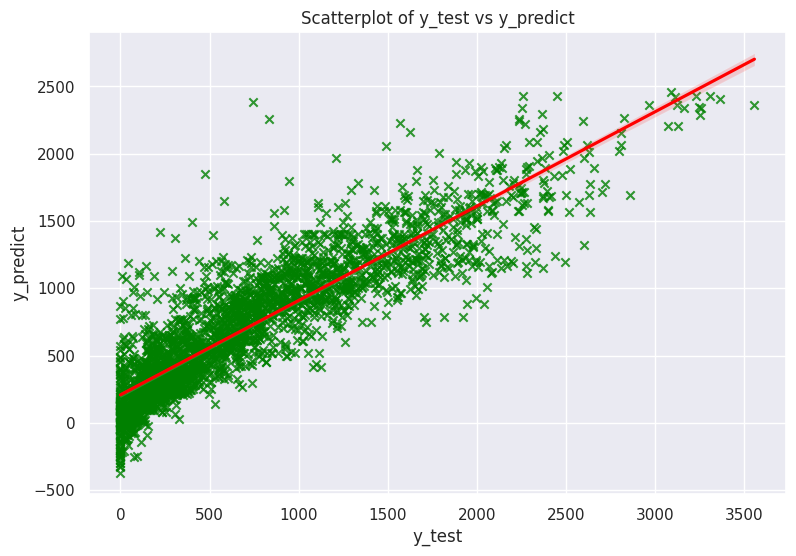

In [457]:
#Xgboost
xgboost_regressor = GradientBoostingRegressor()

#Hyperparameter tuning for medil training
xgboost_regressor_grid=GridSearchCV(estimator=xgboost_regressor,param_grid=param_grid,n_jobs=-1,cv=5)

xgboost_regressor.fit(x_train,y_train)

y_pred=xgboost_regressor.predict(x_test)

#Comparison of differtnt metrics for evaluation
show_evaluation_metrics(y_test,y_pred)

In [458]:
#Calculate Adjusted R square for Xgboost Regression
XgBoost_regression=calc_adjusted_R2(y_test,y_pred)
XgBoost_regression

80.6254533146364

#AdaBoost

R square of model is 26.79
Adjusted_r_square of model is 27.52
Mean Absolute Error of model is 486.04
Mean Squared Error of model is 303128.04
Root Mean Squared Error of model is 550.57
Cross Val Accuracy: 67.94 %
Cross Val Standard Deviation: 1.54 %


      Actual Value  Predicted Value   Difference
6056          1728      1250.851696   477.148304
5556           822      1250.851696  -428.851696
5990           658      1087.694431  -429.694431
7674          2716      1490.787149  1225.212851
3319          1083       831.414338   251.585662
5761           636      1132.282409  -496.282409
5972          1537      1132.282409   404.717591
8758           712       867.961605  -155.961605
6079           425      1132.282409  -707.282409
7177           594      1063.400316  -469.400316




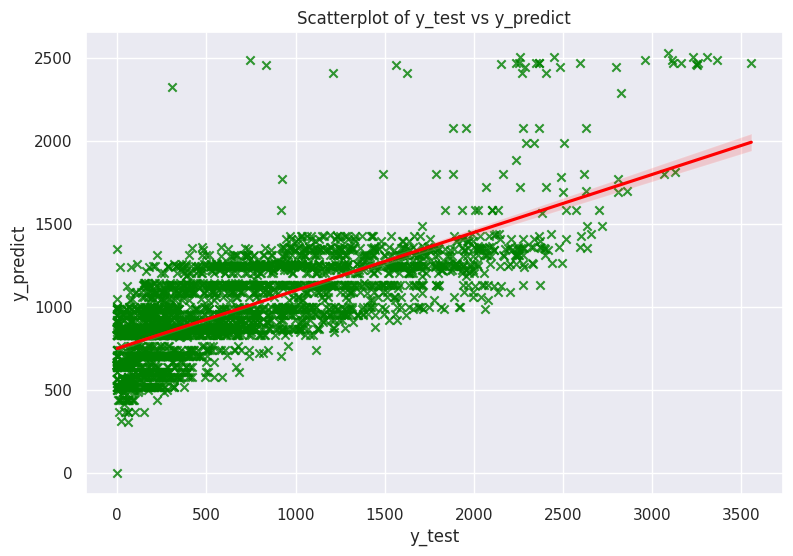

In [459]:
#Adaboost

#fitting model
adaboost_Regressor=AdaBoostRegressor()
adaboost_Regressor.fit(x_train,y_train)

y_pred=adaboost_Regressor.predict(x_test)

#Comparison of differtnt metrics for evaluation
show_evaluation_metrics(y_test,y_pred)

In [460]:
#Calculate Adjusted R square for Adaboost Regression
AdaBoost_regression=calc_adjusted_R2(y_test,y_pred)
AdaBoost_regression

27.52031703682462

#Decision Tree Regressor

R square of model is 70.73
Adjusted_r_square of model is 72.72
Mean Absolute Error of model is 193.35
Mean Squared Error of model is 121185.81
Root Mean Squared Error of model is 348.12
Cross Val Accuracy: 67.94 %
Cross Val Standard Deviation: 1.54 %


      Actual Value  Predicted Value  Difference
6056          1728           1678.0        50.0
5556           822            565.0       257.0
5990           658            666.0        -8.0
7674          2716           1727.0       989.0
3319          1083            152.0       931.0
5761           636            695.0       -59.0
5972          1537           1836.0      -299.0
8758           712            655.0        57.0
6079           425           1059.0      -634.0
7177           594            430.0       164.0




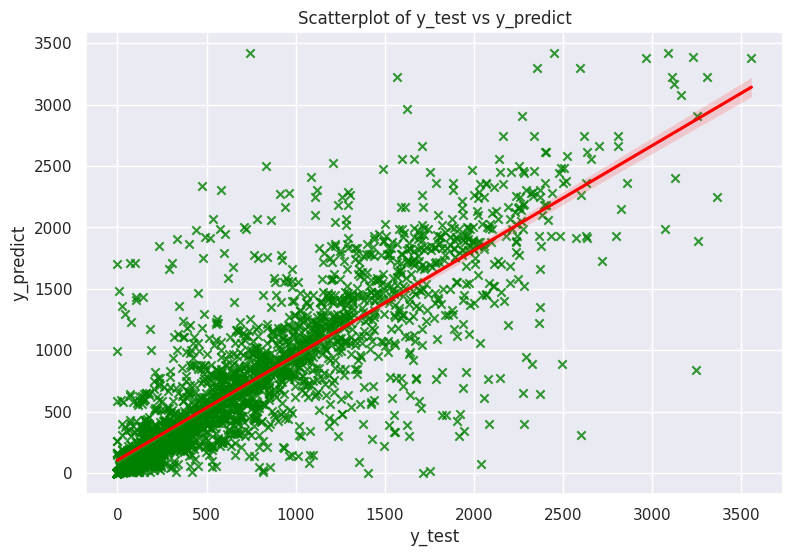

In [461]:
#Decision Tree

dt_model=DecisionTreeRegressor()

dt_model_grid=GridSearchCV(estimator=dt_model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)

#Fitting model over training Data
dt_model.fit(x_train,y_train)

y_pred=dt_model.predict(x_test)

#Comparison of differtnt metrics for evaluation
show_evaluation_metrics(y_test,y_pred)

In [463]:
#Calculate Adjusted R square for Decision Tree Regression
DT_regression=calc_adjusted_R2(y_test,y_pred)
DT_regression

72.71547666426022

# Random Forest Regressor

R square of model is 70.73
Adjusted_r_square of model is 72.72
Mean Absolute Error of model is 193.35
Mean Squared Error of model is 121185.81
Root Mean Squared Error of model is 348.12
Cross Val Accuracy: 67.94 %
Cross Val Standard Deviation: 1.54 %


      Actual Value  Predicted Value  Difference
6056          1728           1678.0        50.0
5556           822            565.0       257.0
5990           658            666.0        -8.0
7674          2716           1727.0       989.0
3319          1083            152.0       931.0
5761           636            695.0       -59.0
5972          1537           1836.0      -299.0
8758           712            655.0        57.0
6079           425           1059.0      -634.0
7177           594            430.0       164.0




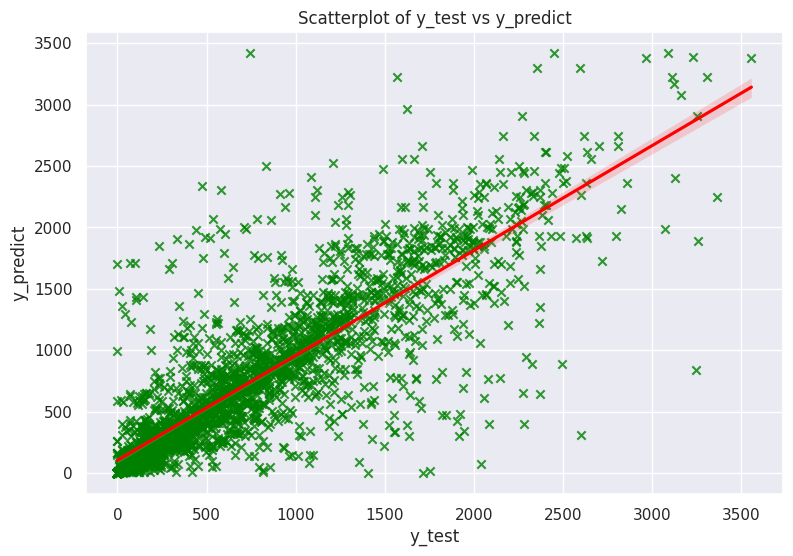

In [462]:
#Random Forest Regressor

rf_model=RandomForestRegressor()

#Fitting model over training Data
rf_model.fit(x_test,y_test)

#Comparison of differtnt metrics for evaluation
show_evaluation_metrics(y_test,y_pred)

In [464]:
#Calculate Adjusted R square for Decision Tree Regression
Random_Forest_regression=calc_adjusted_R2(y_test,y_pred)
Random_Forest_regression

72.71547666426022

In [465]:
#Making dictionary of Regression models and their respective Adjusted R square
Model_selection={'Random Forest':Random_Forest_regression,'Decision Tree': DT_regression,'XgBoost':XgBoost_regression,
                'Adaboost':AdaBoost_regression,'Multilinear':multilinear_regression,'Polynomial':Polynomial_regression,
                 'Ridge Regression':Ridge_regression,'Lasso Regression':Lasso_regression,'Elastic Net Regression':Elastic_net_regression
                }

# Model Selection

In [466]:
Model_selection

{'Random Forest': 72.71547666426022,
 'Decision Tree': 72.71547666426022,
 'XgBoost': 80.6254533146364,
 'Adaboost': 27.52031703682462,
 'Multilinear': 68.24612691298009,
 'Polynomial': 55.93640001332949,
 'Ridge Regression': 70.99981750143246,
 'Lasso Regression': 70.97938268316257,
 'Elastic Net Regression': 69.4095618727444}

In [467]:
#Round off value to 2 decimal
Model_selection_dict={key:round(value,2) for key,value in Model_selection.items()}

In [468]:
#Making Datframe from Dictionary
Model_selection_df=pd.DataFrame([Model_selection_dict])

#Renaming column and sorting in descending order
Model_selection_df_transposed=Model_selection_df.transpose()
Model_selection_df_transposed.rename(columns={0:'Adjusted R-Square'},inplace=True)
Model_selection_df=Model_selection_df_transposed.sort_values(by=['Adjusted R-Square'],ascending=False).reset_index()
Model_selection_df=Model_selection_df.rename({'index':'Model Name'},axis=1)
Model_selection_df

,Model Name,Adjusted R-Square
0,XgBoost,80.63
1,Random Forest,72.72
2,Decision Tree,72.72
3,Ridge Regression,71.00
4,Lasso Regression,70.98
5,Elastic Net Regression,69.41
6,Multilinear,68.25
7,Polynomial,55.94
8,Adaboost,27.52


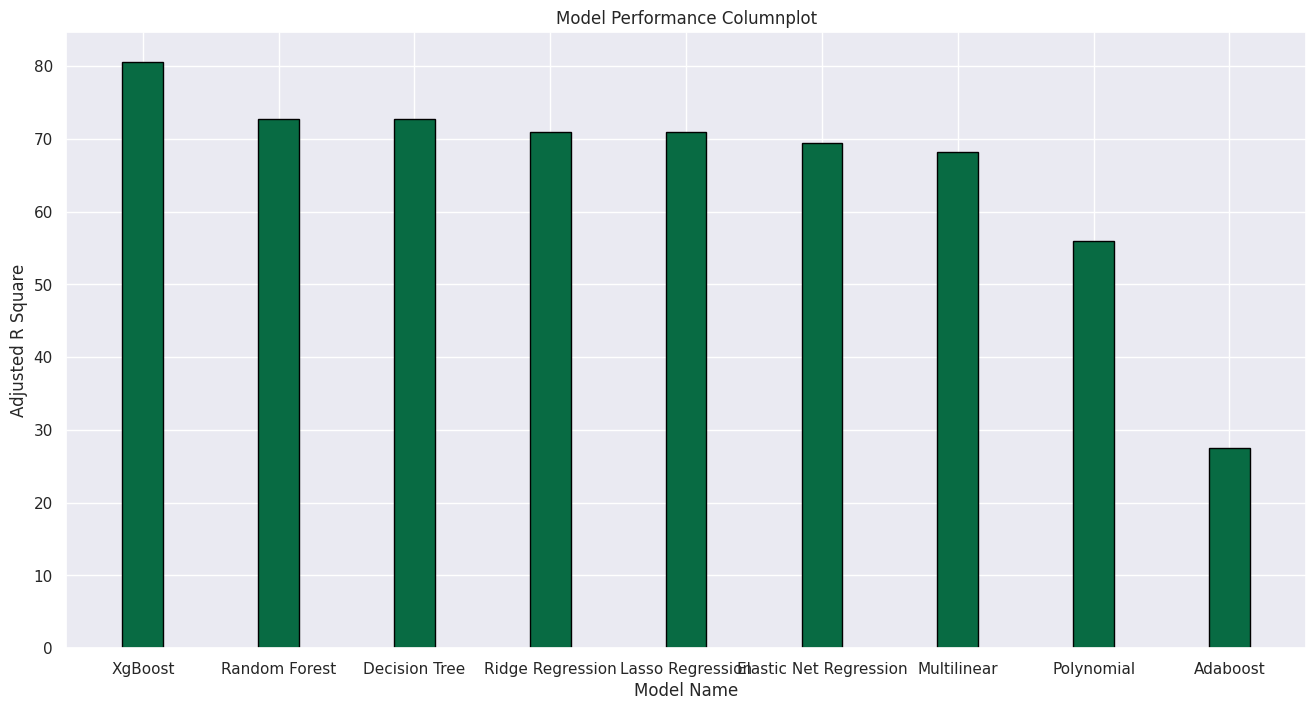

In [469]:
plt.figure(figsize = (16,8))
plt.bar(Model_selection_df['Model Name'],Model_selection_df['Adjusted R-Square'],color='#086b43',edgecolor='black',width=0.3)



# add labels and title
plt.xlabel('Model Name')
plt.ylabel('Adjusted R Square')
plt.title('Model Performance Columnplot')

plt.show()

<b>Numerous performance metrics, such as R Square, Adjusted R Square, Mean Squared Error, and Root Mean Squared Error, are available for assessing the efficacy of regression models.

The choice of the metric should be determined through comprehensive discussions with domain experts. In this instance, the model's predictive performance is evaluated using Adjusted R Square. It is noteworthy that alternative metrics can also be applied to appraise the model.

It is observed that the XGBoost Regressor yields the highest Adjusted R Square value among the models considered. Consequently, the recommendation is to employ XGBoost Regression for predicting rental bike demand based on